In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
import psutil
from keras.layers import Conv2D, Flatten, Dense, Conv2DTranspose, Input, Conv1D, InputLayer, BatchNormalization
from keras.models import Model, Sequential
# from keras.optimizers import Adam
from redspb.form_dataset import generate_dataset
from tensorflow.keras.optimizers.legacy import Adam

In [3]:
df = pd.read_csv("/Users/aleksandrallahverdan/Downloads/part1.csv")
df['numbers'] = df['numbers'].map(lambda x: list(map(float, x[1:-1].split(','))))
df['target'] = df['target'].map(lambda x: list(map(float, x.split(','))))
X, Y, true_raw_shape = generate_dataset(df, info=True)
del df

(816, 22539)
(810, 22500)
Memory size was: 0.13578683137893677 GB,  0.13578683137893677 GB


100%|██████████| 81/81 [00:00<00:00, 2142.23it/s]


Memory size X Y: 1.3524368405342102 GB,  1.3524368405342102 GB


In [6]:
def train_test_split(X, Y, test_size=0.2):
    assert 0 < test_size < 1
    n = int(X.shape[0] * (1-test_size))
    return X[:n], X[n:], Y[:n], Y[n:]

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(108912, 10, 100)
(72609, 10, 100)
(108912, 10, 100)
(72609, 10, 100)


In [7]:
del X
del Y

In [14]:
# Архитектура сети
input_shape = (10, 100, 1)
inputs = Input(shape=input_shape)
x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
outputs = Conv2D(1, kernel_size=(3, 3), activation='linear', padding='same')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
model.fit(x_train, y_train, batch_size=512, epochs=3, validation_split=0.2)

predicted_Y = model.predict(x_test)

/Users/aleksandrallahverdan/PycharmProjects/REDSPb/venv/lib/python3.11/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/3
171/171 [==============================] - 53s 311ms/step - loss: 0.0565 - val_loss: 0.0608
Epoch 2/3
171/171 [==============================] - 53s 310ms/step - loss: 0.0498 - val_loss: 0.0574
Epoch 3/3
2270/2270 [==============================] - 13s 6ms/step


In [28]:
def reconstruct_matrix_super(matrix_target_shape, y, n=10, step_n=10, step_m=10):
    res = []
    i = 0
    while len(y) > matrix_target_shape[1]*(i+1):
        layer = y[matrix_target_shape[1]*i:matrix_target_shape[1]*(i+1):step_m]
        layer = np.concatenate(layer, axis=1)
        res.append(layer)
        i += n // step_n
    res = np.concatenate(res, axis=0)
    return res


In [29]:
rec1 = reconstruct_matrix_super(true_raw_shape, y_test)
rec2 = reconstruct_matrix_super(true_raw_shape, predicted_Y)

rec1.shape

(320, 22500)

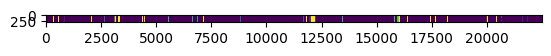

In [30]:
plt.imshow(rec1, cmap='viridis')
plt.show()

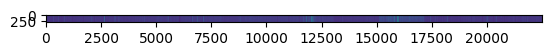

In [31]:
plt.imshow(rec2, cmap='viridis')
plt.show()